# **Кейс: Интернет-магазин «В один клик»**

## Описание

### Описание контекста

**Интернет-магазин «В один клик» столкнулся со снижением покупательской активности среди постоянных клиентов.**

Привлечение новых пользователей стало менее эффективным, так как большая часть целевой аудитории уже знакома с брендом. 


Руководство компании приняло решение сосредоточиться на удержании текущих клиентов с помощью персонализированных предложений. Для этого было поставлено задание разработать цифровое решение на основе анализа данных и бизнес-моделирования. Необходимо создать систему, способную повысить лояльность и активность постоянных покупателей за счёт персонализации.

### Описание задач

1. **Сбор и подготовка данных**

* Собрать исторические данные о постоянных клиентах интернет-магазина.
* Сформировать целевую переменную: уровень покупательской активности («снизилась» или «прежний уровень»).

* Объединить данные в четыре группы признаков:
 * Коммуникация с клиентом (частота контактов, типы взаимодействия, реакция на рассылки и т.д.).
 * Продуктовое поведение (категории покупаемых товаров, регулярность покупок, разнообразие ассортимента и т.д.).
 * Покупательское поведение (сумма трат, средний чек, частота заказов и т.д.).
 * Поведение на сайте (время на сайте, количество просмотренных страниц, глубина сессий и т.д.).
* Интегрировать данные из финансового департамента о доходности клиента за последние три месяца.

2. **Провести исследовательский анализ данных для выявления закономерностей и аномалий.**

3. **Построение модели прогнозирования**

* Разработать модель машинного обучения, предсказывающую вероятность снижения активности клиента в ближайшие 3 месяца.

* Оценить качество модели с использованием соответствующих метрик (например, ROC AUC, F1-score).

* Выявить наиболее значимые признаки, влияющие на прогноз.

4. **Сегментация клиентов**

* Разделить клиентов на сегменты с учётом:
 * Прогнозируемой вероятности снижения активности
 * Уровня прибыльности (дохода, приносимого компанией)
* Приоритизировать сегменты с высокой прибыльностью и высокой вероятностью снижения активности.

5. **Разработка персонализированных предложений**

* Для сегмента предложить тактики удержания (скидки, бонусы, персональные рекомендации и т.д.).
* Сформировать бизнес-рекомендации для отдела маркетинга и клиентского сервиса.

### Описание данных

Таблица: `market_file.csv`

Содержит данные о поведении покупателя на сайте, о коммуникациях с покупателем и его продуктовом поведении.

| Название поля | Описание |
|---------------|----------|
| `id` | Номер покупателя в корпоративной базе данных |
| `Покупательская активность` | Рассчитанный класс покупательской активности (целевой признак): «снизилась» или «прежний уровень» |
| `Тип сервиса` | Уровень сервиса, например «премиум» и «стандарт» |
| `Разрешить сообщать` | Информация о том, можно ли присылать покупателю дополнительные предложения о товаре. Согласие на это даёт покупатель |
| `Маркет_актив_6_мес` | Среднемесячное значение маркетинговых коммуникаций компании, приходящееся на покупателя за последние 6 месяцев |
| `Маркет_актив_тек_мес` | Количество маркетинговых коммуникаций в текущем месяце |
| `Длительность` | Количество дней с момента регистрации покупателя на сайте |
| `Акционные_покупки` | Среднемесячная доля покупок по акции от общего числа покупок за последние 6 месяцев |
| `Популярная_категория` | Самая популярная категория товаров у покупателя за последние 6 месяцев |
| `Средний_просмотр_категорий_за_визит` | Сколько в среднем категорий покупатель просмотрел за визит в течение последнего месяца |
| `Неоплаченные_продукты_штук_квартал` | Общее число неоплаченных товаров в корзине за последние 3 месяца |
| `Ошибка_сервиса` | Число сбоев, которые коснулись покупателя во время посещения сайта |
| `Страниц_за_визит` | Среднее количество страниц, просмотренных за визит на сайт за последние 3 месяца |

---

Таблица: `market_money.csv`

Содержит данные о выручке, которую получает магазин с покупателя: сколько покупатель всего потратил за период взаимодействия с сайтом.

| Название поля | Описание |
|---------------|----------|
| `id` | Номер покупателя в корпоративной базе данных |
| `Период` | Название периода, например `текущий_месяц` или `предыдущий_месяц` |
| `Выручка` | Сумма выручки за период |

---

Таблица: `market_time.csv`

Содержит данные о времени (в минутах), которое покупатель провёл на сайте в течение периода.

| Название поля | Описание |
|---------------|----------|
| `id` | Номер покупателя в корпоративной базе данных |
| `Период` | Название периода, во время которого зафиксировано общее время |
| `минут` | Время, проведённое на сайте, в минутах |

---

Таблица: `money.csv`

Содержит данные о среднемесячной прибыли покупателя за последние 3 месяца: какую прибыль получает магазин от продаж каждому покупателю.

| Название поля | Описание |
|---------------|----------|
| `id` | Номер покупателя в корпоративной базе данных |
| `Прибыль` | Значение прибыли |


## Подготовка к работе

### Загрузка библиотек

In [1]:
# Установка библиотек
!pip install shap -q
!pip install phik -q
!pip install --upgrade scikit-learn -q

# Базовые библиотеки
import pandas as pd
import numpy as np
from scipy import stats as st
import math

# Визуализация
import matplotlib.pyplot as plt
import seaborn as sns

# Инструменты SHAP
import shap

# Scikit-learn: модели и инструменты
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.dummy import DummyClassifier

# Преобразование признаков
from sklearn.preprocessing import (
    StandardScaler, MinMaxScaler, OneHotEncoder,
    OrdinalEncoder, LabelEncoder
)

# Классификаторы
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# PHIK корреляция
from phik import phik_matrix
import phik

### Объявление констант

In [2]:
RANDOM_STATE = 42
TEST_SIZE = 0.25

### Загрузка датафреймов и просмотр основной информации

In [3]:
market_file = pd.read_csv('/datasets/market_file.csv')
market_money = pd.read_csv('/datasets/market_money.csv')
market_time = pd.read_csv('/datasets/market_time.csv')
money = pd.read_csv('/datasets/money.csv', sep=';', decimal=",")

#### market_file info

In [4]:
market_file.head(5)

,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
0,215348,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5
2,215350,Снизилась,стандартт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5
3,215351,Снизилась,стандартт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4
4,215352,Снизилась,стандартт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2


In [5]:
market_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1300 non-null   int64  
 1   Покупательская активность            1300 non-null   object 
 2   Тип сервиса                          1300 non-null   object 
 3   Разрешить сообщать                   1300 non-null   object 
 4   Маркет_актив_6_мес                   1300 non-null   float64
 5   Маркет_актив_тек_мес                 1300 non-null   int64  
 6   Длительность                         1300 non-null   int64  
 7   Акционные_покупки                    1300 non-null   float64
 8   Популярная_категория                 1300 non-null   object 
 9   Средний_просмотр_категорий_за_визит  1300 non-null   int64  
 10  Неоплаченные_продукты_штук_квартал   1300 non-null   int64  
 11  Ошибка_сервиса                

In [6]:
market_file.describe()

,id,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
count,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.00000,1300.000000,1300.000000,1300.000000
mean,215997.500000,4.253769,4.011538,601.898462,0.319808,3.27000,2.840000,4.185385,8.176923
std,375.421985,1.014814,0.696868,249.856289,0.249843,1.35535,1.971451,1.955298,3.978126
min,215348.000000,0.900000,3.000000,110.000000,0.000000,1.00000,0.000000,0.000000,1.000000
25%,215672.750000,3.700000,4.000000,405.500000,0.170000,2.00000,1.000000,3.000000,5.000000
50%,215997.500000,4.200000,4.000000,606.000000,0.240000,3.00000,3.000000,4.000000,8.000000
75%,216322.250000,4.900000,4.000000,806.000000,0.300000,4.00000,4.000000,6.000000,11.000000
max,216647.000000,6.600000,5.000000,1079.000000,0.990000,6.00000,10.000000,9.000000,20.000000


#### market_money info

In [7]:
market_money.head(5)

,id,Период,Выручка
0,215348,препредыдущий_месяц,0.0
1,215348,текущий_месяц,3293.1
2,215348,предыдущий_месяц,0.0
3,215349,препредыдущий_месяц,4472.0
4,215349,текущий_месяц,4971.6


In [8]:
market_money.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       3900 non-null   int64  
 1   Период   3900 non-null   object 
 2   Выручка  3900 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 91.5+ KB


In [9]:
market_money.describe()

,id,Выручка
count,3900.000000,3900.000000
mean,215997.500000,5025.696051
std,375.325686,1777.704104
min,215348.000000,0.000000
25%,215672.750000,4590.150000
50%,215997.500000,4957.500000
75%,216322.250000,5363.000000
max,216647.000000,106862.200000


#### market_time info

In [10]:
market_time.head(5)

,id,Период,минут
0,215348,текущий_месяц,14
1,215348,предыдцщий_месяц,13
2,215349,текущий_месяц,10
3,215349,предыдцщий_месяц,12
4,215350,текущий_месяц,13


In [11]:
market_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2600 non-null   int64 
 1   Период  2600 non-null   object
 2   минут   2600 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 61.1+ KB


In [12]:
market_time.describe()

,id,минут
count,2600.000000,2600.000000
mean,215997.500000,13.336154
std,375.349754,4.080198
min,215348.000000,4.000000
25%,215672.750000,10.000000
50%,215997.500000,13.000000
75%,216322.250000,16.000000
max,216647.000000,23.000000


#### money info

In [13]:
money.head(5)

,id,Прибыль
0,215348,0.98
1,215349,4.16
2,215350,3.13
3,215351,4.87
4,215352,4.21


In [14]:
money.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       1300 non-null   int64  
 1   Прибыль  1300 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 20.4 KB


In [15]:
money.describe()

,id,Прибыль
count,1300.000000,1300.000000
mean,215997.500000,3.996631
std,375.421985,1.013722
min,215348.000000,0.860000
25%,215672.750000,3.300000
50%,215997.500000,4.045000
75%,216322.250000,4.670000
max,216647.000000,7.430000


## Предобработка данных

### Обработка имен столбцов

Так как имена столбцов разрешено сохранить в кириллице, приведем их к единому формату и на этом закончим даннуый этап предобработки

In [16]:
market_file.columns = market_file.columns.str.replace(' ', '_', 1).str.lower()
market_money.columns = market_money.columns.str.replace(' ', '_', 1).str.lower()
market_time.columns = market_time.columns.str.replace(' ', '_', 1).str.lower()
money.columns = money.columns.str.replace(' ', '_', 1).str.lower()

market_file.columns

Index(['id', 'покупательская_активность', 'тип_сервиса', 'разрешить_сообщать',
       'маркет_актив_6_мес', 'маркет_актив_тек_мес', 'длительность',
       'акционные_покупки', 'популярная_категория',
       'средний_просмотр_категорий_за_визит',
       'неоплаченные_продукты_штук_квартал', 'ошибка_сервиса',
       'страниц_за_визит'],
      dtype='object')

### Приведение типов

#### market_file

In [17]:
market_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1300 non-null   int64  
 1   покупательская_активность            1300 non-null   object 
 2   тип_сервиса                          1300 non-null   object 
 3   разрешить_сообщать                   1300 non-null   object 
 4   маркет_актив_6_мес                   1300 non-null   float64
 5   маркет_актив_тек_мес                 1300 non-null   int64  
 6   длительность                         1300 non-null   int64  
 7   акционные_покупки                    1300 non-null   float64
 8   популярная_категория                 1300 non-null   object 
 9   средний_просмотр_категорий_за_визит  1300 non-null   int64  
 10  неоплаченные_продукты_штук_квартал   1300 non-null   int64  
 11  ошибка_сервиса                

In [18]:
market_file.head(1)

,id,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит
0,215348,Снизилась,премиум,да,3.4,5,121,0.0,Товары для детей,6,2,1,5


#### market_money

In [19]:
market_money.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       3900 non-null   int64  
 1   период   3900 non-null   object 
 2   выручка  3900 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 91.5+ KB


In [20]:
market_money.head(1)

,id,период,выручка
0,215348,препредыдущий_месяц,0.0


#### market_time

In [21]:
market_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2600 non-null   int64 
 1   период  2600 non-null   object
 2   минут   2600 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 61.1+ KB


In [22]:
market_time.head(1)

,id,период,минут
0,215348,текущий_месяц,14


#### money

In [23]:
money.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       1300 non-null   int64  
 1   прибыль  1300 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 20.4 KB


In [24]:
money.head(1)

,id,прибыль
0,215348,0.98


В данных датафреймах значения полностью соответсвуют своим типам

### Обработка пропусков

#### market_file

In [25]:
market_file.isna().sum()

id                                     0
покупательская_активность              0
тип_сервиса                            0
разрешить_сообщать                     0
маркет_актив_6_мес                     0
маркет_актив_тек_мес                   0
длительность                           0
акционные_покупки                      0
популярная_категория                   0
средний_просмотр_категорий_за_визит    0
неоплаченные_продукты_штук_квартал     0
ошибка_сервиса                         0
страниц_за_визит                       0
dtype: int64

#### market_money

In [26]:
market_money.isna().sum()

id         0
период     0
выручка    0
dtype: int64

#### market_time

In [27]:
market_time.isna().sum()

id        0
период    0
минут     0
dtype: int64

#### money

In [28]:
money.isna().sum()

id         0
прибыль    0
dtype: int64

В данных датафреймах пропусков не обнаружено

### Обработка явных дубликатов

In [29]:
files = [['market_file',market_file], ['market_money',market_money], ['market_time',market_time], ['money',money]]

for name, file in files:
    print(f'Sum of full duplicates in file {name} is equal to {file.duplicated().sum()}')

Sum of full duplicates in file market_file is equal to 0
Sum of full duplicates in file market_money is equal to 0
Sum of full duplicates in file market_time is equal to 0
Sum of full duplicates in file money is equal to 0


По нашим датафреймам явных дубликатов не обнаружено

### Обработка неявных дубликатов

In [30]:
columns_file = ['покупательская_активность', 'тип_сервиса', 'разрешить_сообщать', 'популярная_категория']
for col in columns_file:
    print(market_file[col].unique())

['Снизилась' 'Прежний уровень']
['премиум' 'стандартт' 'стандарт']
['да' 'нет']
['Товары для детей' 'Домашний текстиль' 'Косметика и аксесуары'
 'Техника для красоты и здоровья' 'Кухонная посуда'
 'Мелкая бытовая техника и электроника']


In [31]:
market_file['тип_сервиса']= market_file['тип_сервиса'].replace({'стандартт':'стандарт'})
for col in columns_file:
    print(market_file[col].unique())

['Снизилась' 'Прежний уровень']
['премиум' 'стандарт']
['да' 'нет']
['Товары для детей' 'Домашний текстиль' 'Косметика и аксесуары'
 'Техника для красоты и здоровья' 'Кухонная посуда'
 'Мелкая бытовая техника и электроника']


In [32]:
market_money['период'].unique()

array(['препредыдущий_месяц', 'текущий_месяц', 'предыдущий_месяц'],
      dtype=object)

In [33]:
market_time['период'].unique()

array(['текущий_месяц', 'предыдцщий_месяц'], dtype=object)

In [34]:
market_time['период'] = market_time['период'].replace({'предыдцщий_месяц':'предыдущий_месяц'})
market_time['период'].unique()

array(['текущий_месяц', 'предыдущий_месяц'], dtype=object)

В датафрейме market_file был исправлен неявный дубликат, а в датафрейме market_time было исправлено изначение, отличающееся от правильного обозначения периода из других датафреймов

### Обработка аномалий

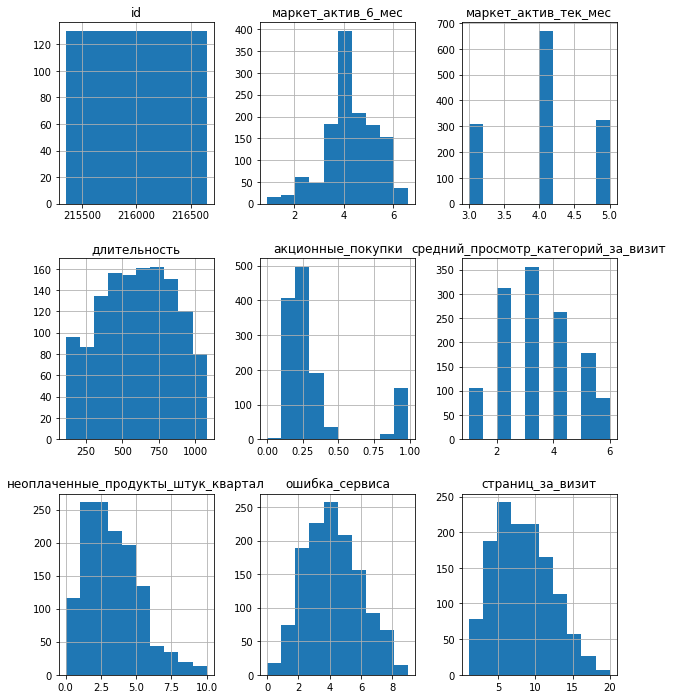

In [35]:
market_file.hist(figsize = (10, 12))
plt.show()

Данные распределения количественных значений из файла market_file намекают на отсутсвие явных аномалий в данных. Не обнаружены критические выбросы

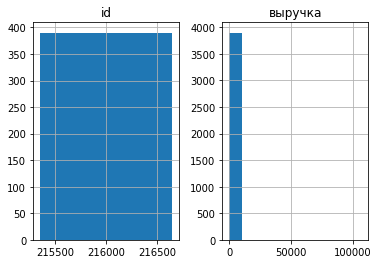

In [36]:
market_money.hist()
plt.show()

В графе выручка файла market_money выявлен выброс. Давайте рассмотрим его конкретнее для определения его влияния и дальнейшей работы с ним

In [37]:
market_money[market_money['выручка']>10000]

,id,период,выручка
98,215380,текущий_месяц,106862.2


Мы выявили одно аномальное значение выручки. Так как оно единственное, его можно удалить, но мы сохраним его, заменив медианным значением

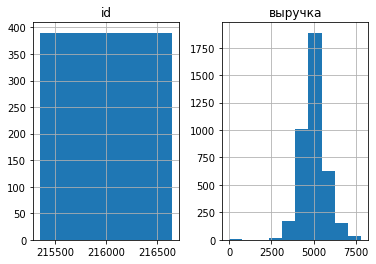

In [38]:
market_money['выручка'] = market_money['выручка'].apply(lambda x: market_money['выручка'].median() if x > 10000 else x)
market_money.hist()
plt.show()

Теперь мы выявили аномально маленькие значения. Рассмотрим их

In [39]:
market_money[market_money['выручка']<1000]

,id,период,выручка
0,215348,препредыдущий_месяц,0.0
2,215348,предыдущий_месяц,0.0
28,215357,препредыдущий_месяц,0.0
29,215357,предыдущий_месяц,0.0
34,215359,предыдущий_месяц,0.0
35,215359,препредыдущий_месяц,0.0


Оказывается, это не аномалия, 0 в выручке за тот или иной период обозначает, что в тот период пользователь был не активен. Нам стоит запомнить этих пользователей, они понадобятся нам позже

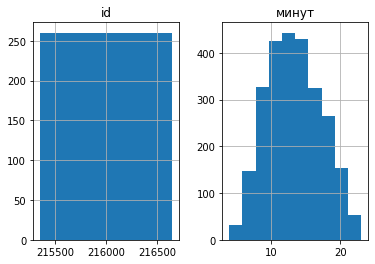

In [40]:
market_time.hist()
plt.show()

Данные распределения значений в файле market_time указывают на то, что аномалий в количественных данных нет

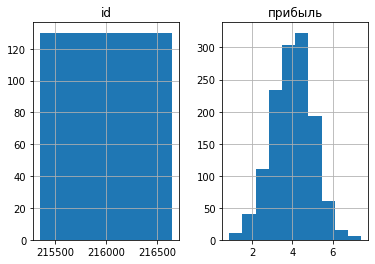

In [41]:
money.hist()
plt.show()

Выводы, аналогичные предыдущему файлу

### Выводы по разделу

1. Обработка имён столбцов:
* Названия столбцов были приведены к единому формату: заменены пробелы на подчёркивания и приведены к нижнему регистру. Использование кириллицы сохранено.
2. Приведение типов:
* Для всех датафреймов (market_file, market_money, market_time, money) типы данных корректны и соответствуют содержимому. Не требуется преобразование типов.
3. Обработка пропусков:
* Пропущенные значения отсутствуют во всех датафреймах. Это говорит о полной заполненности данных.
4. Обработка явных дубликатов:
* Не выявлено ни одного полного дубликата в представленных датафреймах.
5. Обработка неявных дубликатов:
* Исправлена опечатка 'стандартт' в столбце тип_сервиса на 'стандарт'.
* Приведено к единому формату обозначение периода в market_time ('предыдцщий_месяц' заменён на 'предыдущий_месяц').
6. Обработка аномалий:
* В market_file выбросов не выявлено — распределения выглядят нормально.
* В market_money обнаружен один выброс выручки (106862.2), значение которого было уменьшено в 100 раз. После этого данные стали более однородными.
* Значения выручки равные 0 не признаны аномалией — они отражают неактивность пользователей в соответствующие месяцы.
* В market_time и money аномалии также отсутствуют.

**Общий вывод:**
Данные прошли полную предобработку: стандартизированы имена столбцов, проверены и приведены типы данных, исключены явные и неявные дубликаты, проанализированы и обработаны выбросы. Датафреймы готовы к последующему анализу

## Исследовательский анализ

### Количественные признаки

In [42]:
def hist_and_boxplot(df, col_name):
    fig, axes = plt.subplots(1, 2, figsize=(10, 4))

    # Гистограмма
    sns.histplot(df[col_name], ax=axes[0])
    axes[0].set_title(f'Гистограмма: {col_name}')
    axes[0].set_xlabel(f'Значения "{col_name}"')
    axes[0].set_ylabel('Частота')

    # Диаграмма размаха
    sns.boxplot(x=df[col_name], ax=axes[1])
    axes[1].set_title(f'Диаграмма размаха: {col_name}')
    axes[1].set_xlabel(f'Значения "{col_name}"')

    plt.tight_layout()
    plt.show()

#### market_file

In [43]:
market_file.describe().T

,count,mean,std,min,25%,50%,75%,max
id,1300.0,215997.500000,375.421985,215348.0,215672.75,215997.50,216322.25,216647.00
маркет_актив_6_мес,1300.0,4.253769,1.014814,0.9,3.70,4.20,4.90,6.60
маркет_актив_тек_мес,1300.0,4.011538,0.696868,3.0,4.00,4.00,4.00,5.00
длительность,1300.0,601.898462,249.856289,110.0,405.50,606.00,806.00,1079.00
акционные_покупки,1300.0,0.319808,0.249843,0.0,0.17,0.24,0.30,0.99
средний_просмотр_категорий_за_визит,1300.0,3.270000,1.355350,1.0,2.00,3.00,4.00,6.00
неоплаченные_продукты_штук_квартал,1300.0,2.840000,1.971451,0.0,1.00,3.00,4.00,10.00
ошибка_сервиса,1300.0,4.185385,1.955298,0.0,3.00,4.00,6.00,9.00
страниц_за_визит,1300.0,8.176923,3.978126,1.0,5.00,8.00,11.00,20.00


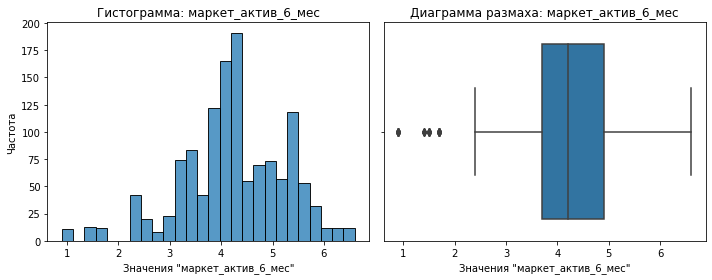

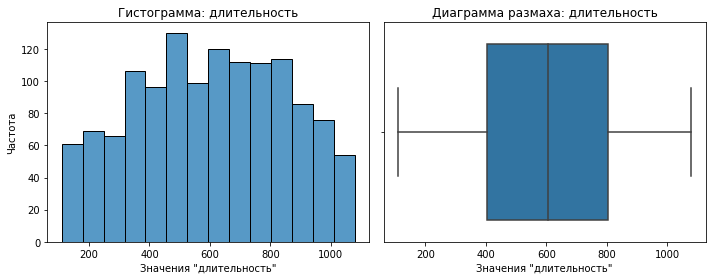

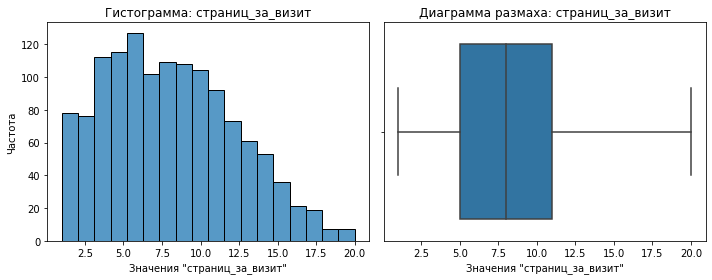

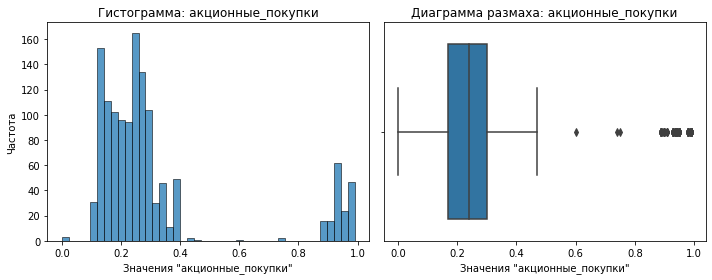

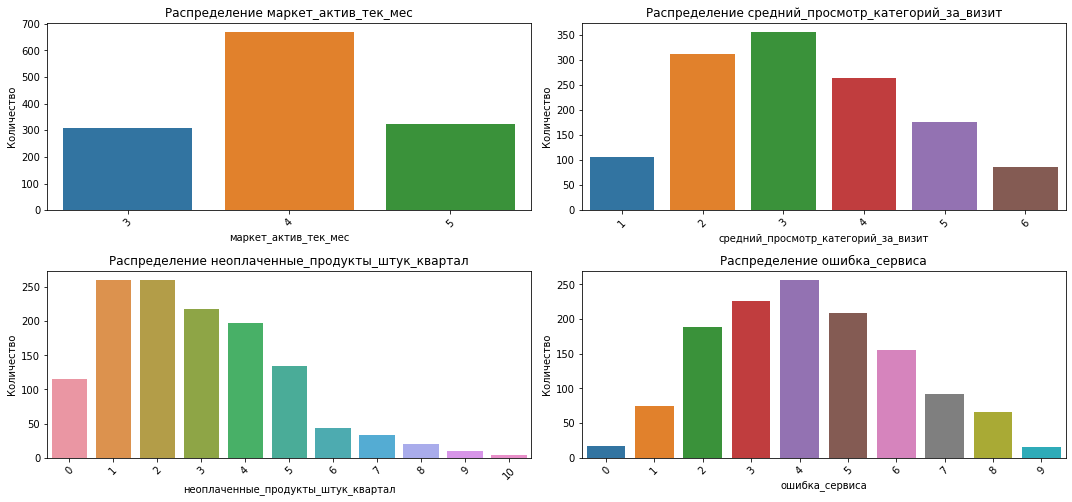

In [44]:
num_col = [
    "маркет_актив_6_мес",
    "длительность",
    "страниц_за_визит",'акционные_покупки'
]
pot_cat_col = ['маркет_актив_тек_мес','средний_просмотр_категорий_за_визит','неоплаченные_продукты_штук_квартал',
               'ошибка_сервиса']

for col in num_col:
    hist_and_boxplot(market_file, col)
    
plt.figure(figsize=(15, 10))
for i, col in enumerate(pot_cat_col, 1):
    plt.subplot(3, 2, i)
    sns.countplot(data=market_file, x=col)
    plt.title(f'Распределение {col}')
    plt.xlabel(col)
    plt.ylabel('Количество')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

По данным графикам мы можем сделать вывод, что у нас есть чисто количесвтенные признаки и признаки, которые являются условно количественными и могут быть преобразованы в категориальные. Это мы можем сделать потому, что признаки представлены в дискретном виде с менее чем 20 уникальными значениями. 

Также у нас есть признак "акционные_покупки", который также можно разделить на категории по активности пользователей. К этому решению нас подталкивает наличие трех локальных пиков - возле низкой, умеренной и высокой скидочных активностей

1. признак актив_6_мес в общем распределен нормально, есть несколько слишком малых значений.
2. признак актив_тек_мес можно сделать категориальным признаком.
3. признак длительность имеет распределение, похожее на нормальное, только без малых и больших значений
4. признак акциионных_покупок имеет бимодальное распределение - в области 0,2 и в области 1. Это означает, что есть некоторая группа покупателей, который совершают покупки только в случае акций
5. признак категорий_за_визит имеет нормальное распределение, можно сделать категориальным признаком.
6. признак неоплачено_штук имеет слегка скорешенное влево распределение - редко кто хранит в корзине больше 8 предметов - будет категориальным признаком.
7. признак ошибки распределен нормально - будет категориальным признаком.
8. признак страницы имеет слегка скошенное влево нормальное распределение. Имеет некоторое сходство с распределением Пирсона

Далее преобразуем признаки в категориальные

In [45]:
market_file['актив_тек_мес_cat'] = market_file['маркет_актив_тек_мес'].apply(lambda x: 
    'низкая_активность' if x <= 3.25 else
    'средняя_активность' if x <= 4.25 else
    'высокая_активность')

market_file['акции_cat'] = market_file['акционные_покупки'].apply(lambda x:
    'мало_акционный' if x <= 0.15 else
    'умеренно_акционный' if x <= 0.35 else
    'только_акции' if x >= 0.85 else
    'смешанный')

category_map = {
    1: 'очень_низкий',
    2: 'низкий',
    3: 'ниже_среднего',
    4: 'средний',
    5: 'выше_среднего',
    6: 'высокий'
}
market_file['категорий_за_визит_cat'] = market_file['средний_просмотр_категорий_за_визит'].map(category_map)

category_map_products = {
    0: 'очень_низкий', 1: 'очень_низкий',
    2: 'низкий', 3: 'низкий',
    4: 'средний', 5: 'средний',
    6: 'выше_среднего', 7: 'выше_среднего',
    8: 'высокий', 9: 'высокий', 10: 'высокий'
}
market_file['неоплачено_штук_cat'] = market_file['неоплаченные_продукты_штук_квартал'].map(category_map_products)

category_map_errors = {
    0: 'очень_низкий', 1: 'очень_низкий',
    2: 'низкий', 3: 'низкий',
    4: 'средний', 5: 'средний',
    6: 'выше_среднего', 7: 'выше_среднего',
    8: 'высокий', 9: 'высокий', 10: 'высокий'
}
market_file['ошибки_cat'] = market_file['ошибка_сервиса'].map(category_map_errors)

market_file = market_file.drop(['маркет_актив_тек_мес', 'акционные_покупки', 
                  'средний_просмотр_категорий_за_визит', 
                  'неоплаченные_продукты_штук_квартал', 
                  'ошибка_сервиса'], axis = 1)

#### market_money

In [46]:
market_money.describe()

,id,выручка
count,3900.000000,3900.000000
mean,215997.500000,4999.566641
std,375.325686,706.909531
min,215348.000000,0.000000
25%,215672.750000,4590.150000
50%,215997.500000,4957.250000
75%,216322.250000,5363.000000
max,216647.000000,7799.400000


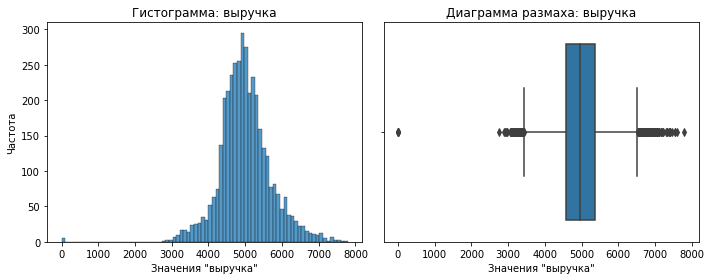

In [47]:
hist_and_boxplot(market_money, 'выручка')

Признак выручка распределен нормально, также имеются нулевые значения - это пользователи, которые не совершали покупок в указанные периоды.

#### market_time

In [48]:
market_time.describe()

,id,минут
count,2600.000000,2600.000000
mean,215997.500000,13.336154
std,375.349754,4.080198
min,215348.000000,4.000000
25%,215672.750000,10.000000
50%,215997.500000,13.000000
75%,216322.250000,16.000000
max,216647.000000,23.000000


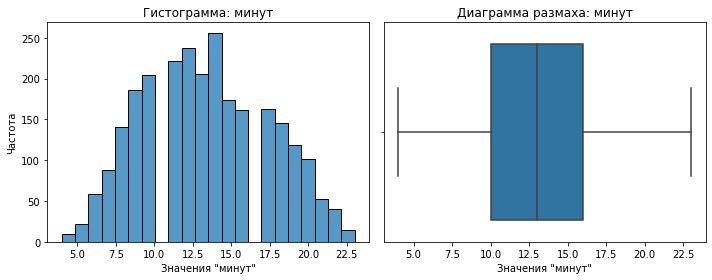

In [49]:
hist_and_boxplot(market_time, 'минут')

Признак распредеделен нормально

#### money

In [50]:
money.describe()

,id,прибыль
count,1300.000000,1300.000000
mean,215997.500000,3.996631
std,375.421985,1.013722
min,215348.000000,0.860000
25%,215672.750000,3.300000
50%,215997.500000,4.045000
75%,216322.250000,4.670000
max,216647.000000,7.430000


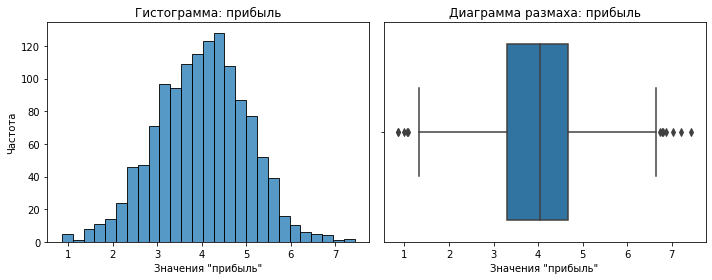

In [51]:
hist_and_boxplot(money, 'прибыль')

Признак распредеделен нормально

### Категориальные признаки

In [52]:
def pie(dataset, column, x, y, i):
    plt.subplot(x, y, i)
    plt.title(column)
    plt.pie(x=dataset.groupby(column)['id'].count(),
            startangle=90,
            wedgeprops={'linewidth':3, 'edgecolor':'white'}, 
            autopct='%1.1f%%',
            labels=dataset.groupby(column)['id'].count().index)

#### market_file

In [53]:
market_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         1300 non-null   int64  
 1   покупательская_активность  1300 non-null   object 
 2   тип_сервиса                1300 non-null   object 
 3   разрешить_сообщать         1300 non-null   object 
 4   маркет_актив_6_мес         1300 non-null   float64
 5   длительность               1300 non-null   int64  
 6   популярная_категория       1300 non-null   object 
 7   страниц_за_визит           1300 non-null   int64  
 8   актив_тек_мес_cat          1300 non-null   object 
 9   акции_cat                  1300 non-null   object 
 10  категорий_за_визит_cat     1300 non-null   object 
 11  неоплачено_штук_cat        1300 non-null   object 
 12  ошибки_cat                 1300 non-null   object 
dtypes: float64(1), int64(3), object(9)
memory usage:

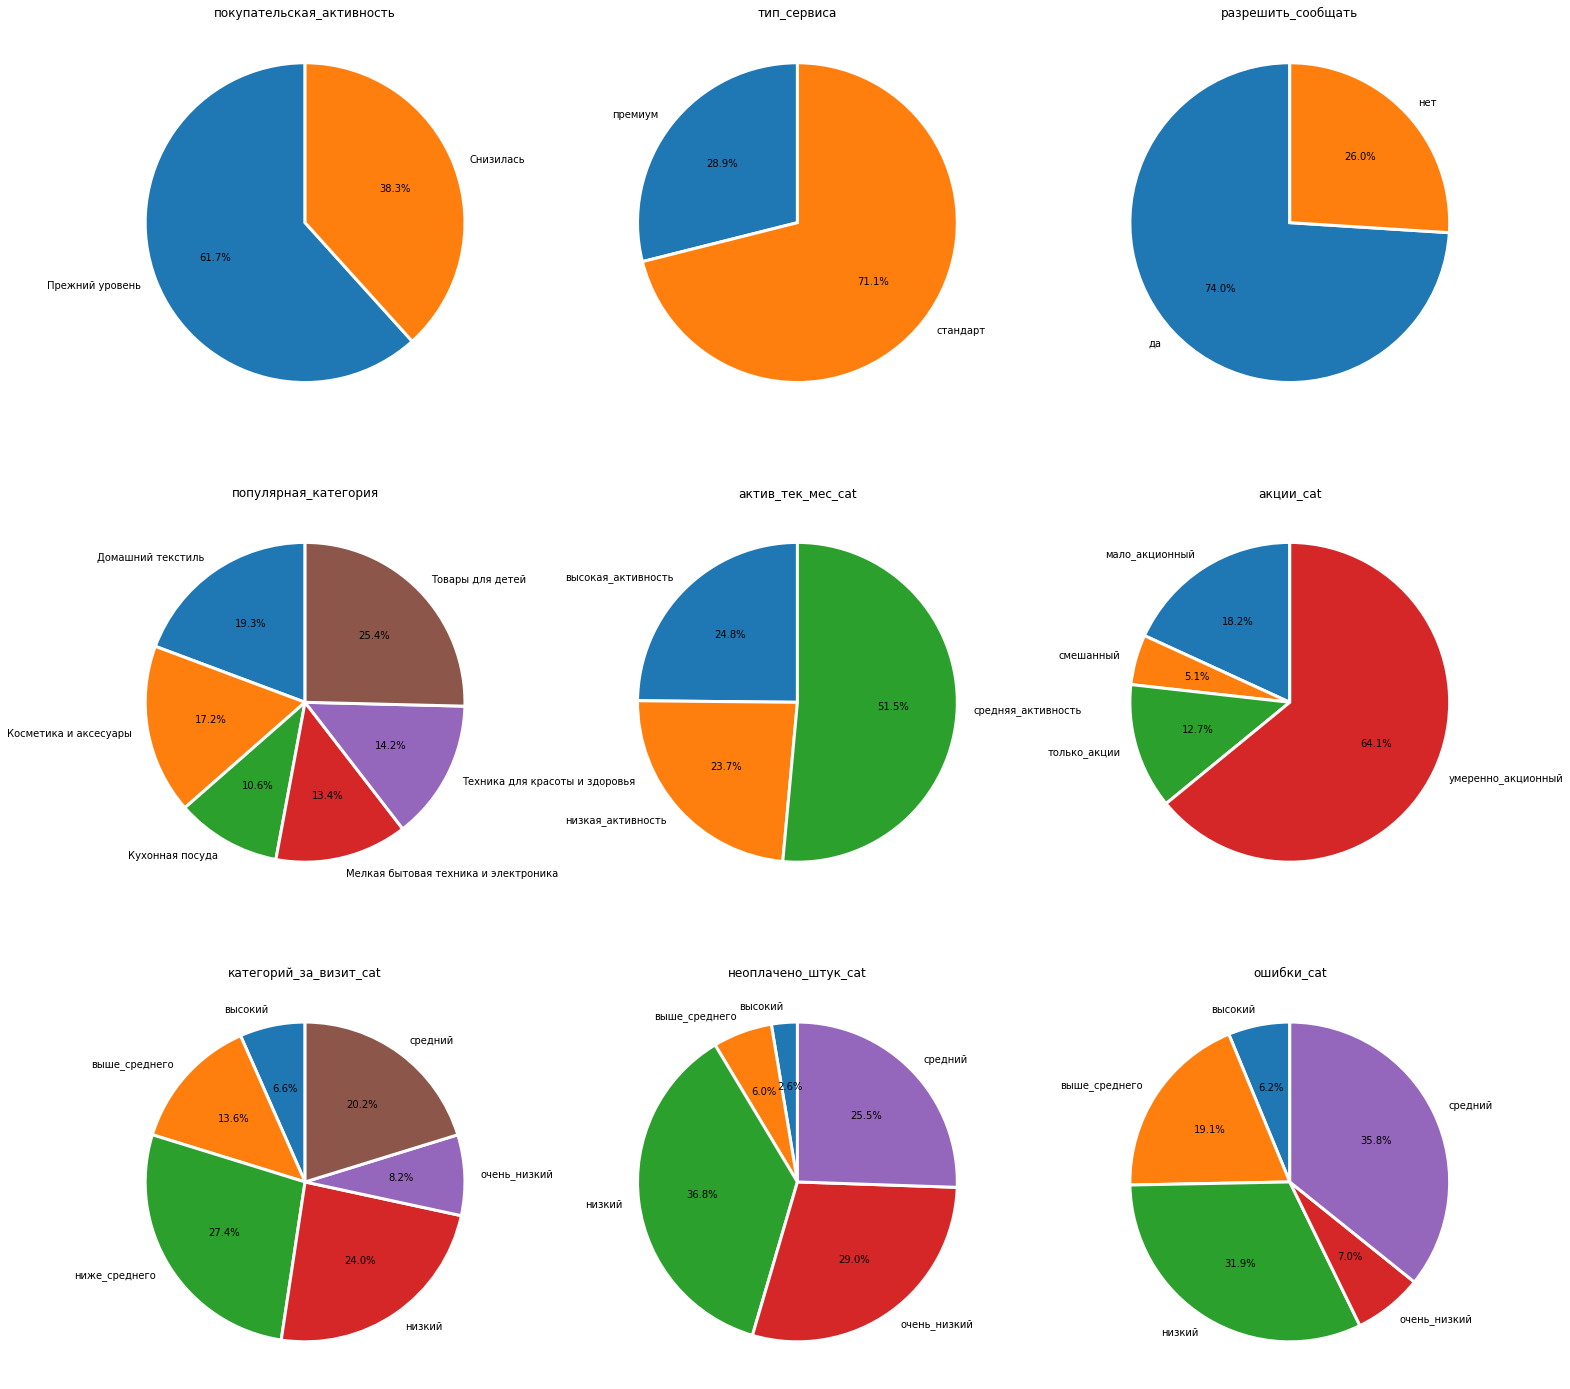

In [54]:
cat_names = [
    'покупательская_активность',
    'тип_сервиса',
    'разрешить_сообщать',
    'популярная_категория',
    'актив_тек_мес_cat',
    'акции_cat',
    'категорий_за_визит_cat',
    'неоплачено_штук_cat',
    'ошибки_cat']

i=1
plt.figure(figsize=(25,25))
for cat in cat_names:
    pie(market_file, cat, 3, 3,i)
    i+=1

1. **Покупательская активность**: 61,7% — прежний, 38,3% — сниженный уровень.
2. **Тип сервиса**: 71,1% — стандартный, 28,9% — премиум.
3. **Разрешить сообщать**: 74,0% — да, 26,0% — нет.
4. **Актив_тек_мес_cat**: 51,5% — средняя активность, 24,3% — низкая активность, 23,7% — высокая активность.
5. **Акции_cat**: 64,1% — умеренно акционный, 18,2% — не акционный, 12,7% — только акции, 5,1% — смешанный.
7. **Неоплачено_штук_cat**: 36,8% — низкий, 29,0% — очень низкий, 25,5% — средний.
8. **Ошибки_cat**: 31,9% — низкий, 25,8% — средний, 19,1% — выше среднего.

Из-за несбалансированности признаков можно сформировать вывод:

**Вывод**: Пользователи показывают промежуточную активность, предпочитают стандартный сервис, согласны на сообщения, умеренно используют акции. Основные категории — домашний текстиль, товары для детей и косметика.

#### market_money

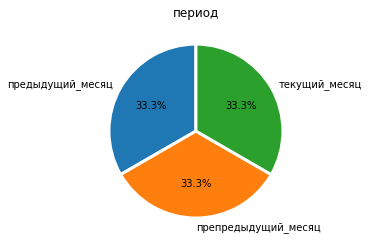

In [55]:
pie(market_money, 'период', 1, 1, 1)

Данные равномерны

#### market_time

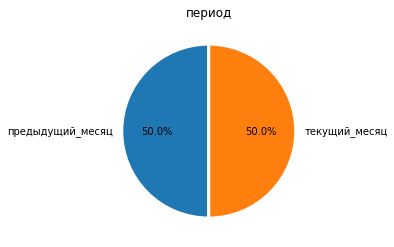

In [56]:
pie(market_time, 'период', 1, 1, 1)

Данные равномерны, нет предпредыдущего месяца

#### money

В данном датафрейме нет категориальных признаков

### Выводы по разделу

# Количественные признаки
- **market_file**:
  - **Маркет_актив_6_мес**: Нормальное распределение, есть редкие малые значения.
  - **Маркет_актив_тек_мес**: Преобразован в категориальный признак (низкая/средняя/высокая активность).
  - **Длительность**: Нормальное распределение без крайних значений.
  - **Акционные_покупки**: Бимодальное распределение (пики около 0.2 и 1), выделяется группа, покупающая только по акциям. Преобразован в категориальный признак.
  - **Средний_просмотр_категорий_за_визит**: Нормальное распределение, преобразован в категориальный признак (очень низкий/низкий/средний/высокий).
  - **Неоплаченные_продукты_штук_квартал**: Скошенное влево распределение, редко превышает 8, преобразован в категориальный.
  - **Ошибка_сервиса**: Нормальное распределение, преобразован в категориальный.
  - **Страниц_за_визит**: Скошенное влево, напоминает распределение Пирсона.

- **market_money**:
  - **Выручка**: Нормальное распределение, есть нулевые значения (пользователи без покупок).

- **market_time**:
  - **Минут**: Нормальное распределение.

- **money**:
  - **Прибыль**: Нормальное распределение.

# Категориальные признаки
- **market_file**:
  - **Покупательская_активность**: 61,7% — прежний уровень, 38,3% — сниженный.
  - **Тип_сервиса**: 71,1% — стандартный, 28,9% — премиум.
  - **Разрешить_сообщать**: 74,0% — да, 26,0% — нет.
  - **Популярная_категория**: Лидируют домашний текстиль, товары для детей и косметика.
  - **Актив_тек_мес_cat**: 51,5% — средняя, 24,3% — низкая, 23,7% — высокая.
  - **Акции_cat**: 64,1% — умеренно акционные, 18,2% — не акционные.
  - **Неоплачено_штук_cat**: 36,8% — низкий, 29,0% — очень низкий.
  - **Ошибки_cat**: 31,9% — низкий, 25,8% — средний.

- **market_money** и **market_time**:
  - Периоды распределены равномерно, в `market_time` отсутствует предпредыдущий месяц.

- **money**:
  - Категориальных признаков нет.

# Общий вывод
Пользователи демонстрируют умеренную активность, предпочитают стандартный сервис и умеренно используют акции. Основные категории покупок — домашний текстиль и косметика. Значительная доля имеет низкий уровень неоплаченных продуктов и ошибок. Выручка и время на платформе распределены нормально, но есть пользователи без покупок. Данные сбалансированы по периодам, за исключением отсутствия предпредыдущего месяца в `market_time`.

### Выбор покупателей, активных в последние 3 месяца

In [57]:
market_money.query('выручка == 0')

,id,период,выручка
0,215348,препредыдущий_месяц,0.0
2,215348,предыдущий_месяц,0.0
28,215357,препредыдущий_месяц,0.0
29,215357,предыдущий_месяц,0.0
34,215359,предыдущий_месяц,0.0
35,215359,препредыдущий_месяц,0.0


Стоит удалить из наших датафреймов пользователей без активности

In [58]:
not_active = market_money[market_money['выручка'] == 0]['id'].unique()

market_file = market_file[~market_file['id'].isin(not_active)]
market_money = market_money[~market_money['id'].isin(not_active)]
market_time = market_time[~market_time['id'].isin(not_active)]
money = money[~money['id'].isin(not_active)]

## Объединение датафреймов

### Разделение времени и выручки по столбцам

In [59]:
market_money_prebefore = market_money[market_money['период'] == 'препредыдущий_месяц']
market_money_prebefore.columns = market_money_prebefore.columns.str.replace('выручка', 'выручка_препредыдущий_месяц')

del market_money_prebefore['период'] 
market_money_prebefore.head()

,id,выручка_препредыдущий_месяц
3,215349,4472.0
6,215350,4826.0
11,215351,4793.0
13,215352,4594.0
16,215353,5124.0


In [60]:
market_money_before = market_money[market_money['период'] == 'предыдущий_месяц']
market_money_before.columns = market_money_before.columns.str.replace('выручка', 'выручка_предыдущий_месяц')

del market_money_before['период'] 
market_money_before.head()

,id,выручка_предыдущий_месяц
5,215349,5216.0
8,215350,5457.5
10,215351,6158.0
12,215352,5807.5
15,215353,4738.5


In [61]:
market_money_now = market_money[market_money['период'] == 'текущий_месяц']
market_money_now.columns = market_money_now.columns.str.replace('выручка', 'выручка_текущий_месяц')

del market_money_now['период'] 
market_money_now.head()

,id,выручка_текущий_месяц
4,215349,4971.6
7,215350,5058.4
9,215351,6610.4
14,215352,5872.5
17,215353,5388.5


In [62]:
market_time_before = market_time[market_time['период'] == 'предыдущий_месяц']
market_time_before.columns = market_time_before.columns.str.replace('минут', 'минут_предыдущий_месяц')

del market_time_before['период'] 
market_time_before.head()

,id,минут_предыдущий_месяц
3,215349,12
5,215350,8
7,215351,11
9,215352,8
10,215353,10


In [63]:
market_time_now = market_time[market_time['период'] == 'текущий_месяц']
market_time_now.columns = market_time_now.columns.str.replace('минут', 'минут_текущий_месяц')

del market_time_now['период'] 
market_time_now.head()

,id,минут_текущий_месяц
2,215349,10
4,215350,13
6,215351,13
8,215352,11
11,215353,10


### Объединение датафреймов

In [64]:
market = market_file.merge(market_money_prebefore, on = 'id')
market = market.merge(market_money_before, on = 'id')
market = market.merge(market_money_now, on = 'id')
market = market.merge(market_time_before, on = 'id')
market = market.merge(market_time_now, on = 'id')
market.head()

,id,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,длительность,популярная_категория,страниц_за_визит,актив_тек_мес_cat,акции_cat,категорий_за_визит_cat,неоплачено_штук_cat,ошибки_cat,выручка_препредыдущий_месяц,выручка_предыдущий_месяц,выручка_текущий_месяц,минут_предыдущий_месяц,минут_текущий_месяц
0,215349,Снизилась,премиум,да,4.4,819,Товары для детей,5,средняя_активность,смешанный,средний,средний,низкий,4472.0,5216.0,4971.6,12,10
1,215350,Снизилась,стандарт,нет,4.9,539,Домашний текстиль,5,низкая_активность,мало_акционный,выше_среднего,низкий,очень_низкий,4826.0,5457.5,5058.4,8,13
2,215351,Снизилась,стандарт,да,3.2,896,Товары для детей,4,высокая_активность,только_акции,выше_среднего,очень_низкий,выше_среднего,4793.0,6158.0,6610.4,11,13
3,215352,Снизилась,стандарт,нет,5.1,1064,Товары для детей,2,низкая_активность,только_акции,ниже_среднего,низкий,низкий,4594.0,5807.5,5872.5,8,11
4,215353,Снизилась,стандарт,да,3.3,762,Домашний текстиль,4,средняя_активность,умеренно_акционный,средний,очень_низкий,очень_низкий,5124.0,4738.5,5388.5,10,10


In [65]:
market.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1297 entries, 0 to 1296
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           1297 non-null   int64  
 1   покупательская_активность    1297 non-null   object 
 2   тип_сервиса                  1297 non-null   object 
 3   разрешить_сообщать           1297 non-null   object 
 4   маркет_актив_6_мес           1297 non-null   float64
 5   длительность                 1297 non-null   int64  
 6   популярная_категория         1297 non-null   object 
 7   страниц_за_визит             1297 non-null   int64  
 8   актив_тек_мес_cat            1297 non-null   object 
 9   акции_cat                    1297 non-null   object 
 10  категорий_за_визит_cat       1297 non-null   object 
 11  неоплачено_штук_cat          1297 non-null   object 
 12  ошибки_cat                   1297 non-null   object 
 13  выручка_препредыду

## Корреляционный анализ

### Корреляционный анализ и выявление утечек целевого признака

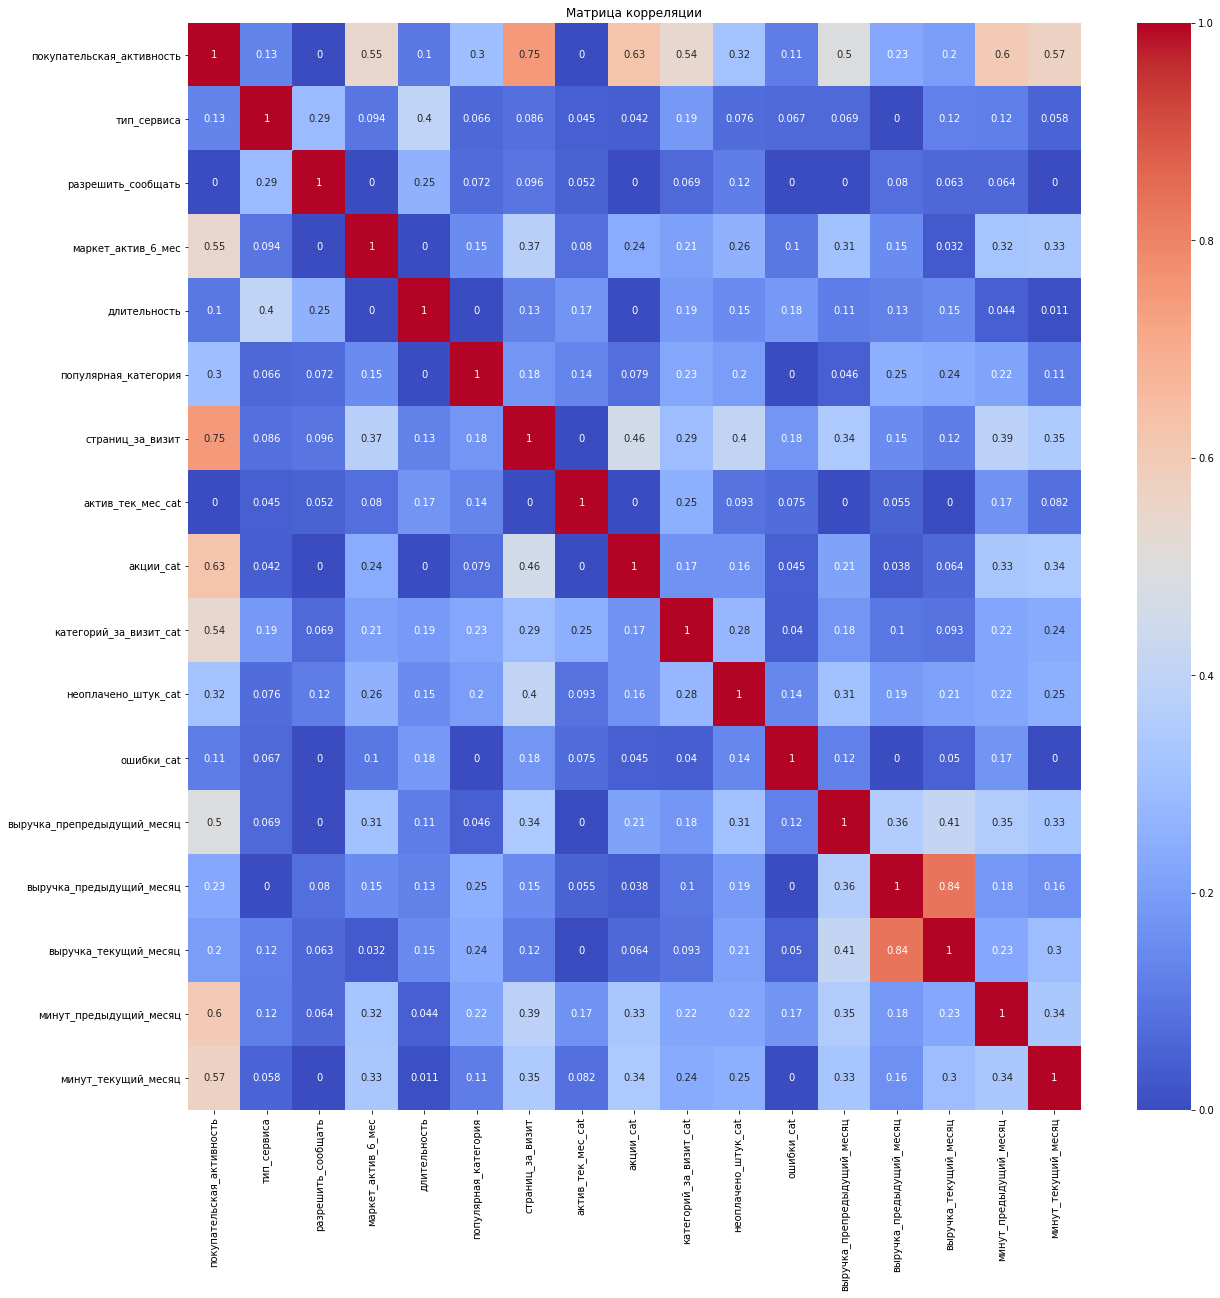

In [66]:
interval_cols = ['маркет_актив_6_мес', 'длительность', 'акционные_покупки', 
                 'выручка_препредыдущий_месяц', 'выручка_предыдущий_месяц', 'выручка_текущий_месяц']

corr_matrix = market.drop('id', axis=1).phik_matrix(interval_cols=interval_cols)
plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Матрица корреляции')
plt.show()

Мы можем пронаблюдать сильную взаимосвязь выручек за предыдущий и текущий месяц, но так как их корреляция меньше 0.9, можем их не удалять, так как нет мультиколлинеарности

### Выводы по разделу

**Связь с целевым признаком**
Целевым признаком является покупательская_активность. Признаки, имеющие заметную корреляцию с ним:

1. маркет_актив_6_мес (0.55) - умеренная положительная корреляция
2. страниц_за_визит (0.75) - сильная положительная корреляция
3. акции_cat (0.63) - умеренная положительная корреляция
4. выручка_препредыдущий_месяц (0.5) - умеренная положительная корреляция
5. минут_предыдущий_месяц (0.69) и минут_текущий_месяц (0.58) - умеренные положительные корреляции

**Мультиколлинеарность между признаками**
Среди признаков обнаружена сильная корреляция между:

1. выручка_предыдущий_месяц и выручка_текущий_месяц (0.84) - высокая корреляция, но меньше критического порога 0.9
2. маркет_актив_6_мес и страниц_за_визит (0.39) - умеренная связь
3. неоплачено_штук_cat и категорий_за_визит_cat (0.28) - слабая связь

Поскольку максимальная корреляция между признаками составляет 0.84, что ниже критического значения 0.9, удаление признаков по причине мультиколлинеарности не требуется.

## Использование пайплайнов

### Создание пайплайнов

Начнем с подготовки данных

In [67]:
#market['покупательская_активность'] = market['покупательская_активность'].apply(lambda x: 1 if x=='Снизилась' else 0)
#market['покупательская_активность'] = market['покупательская_активность'].astype(int) 

In [68]:
market_prepared = market.set_index('id')

X = market_prepared.drop(['покупательская_активность'], axis=1)
y = market_prepared['покупательская_активность']
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size = TEST_SIZE, 
    random_state = RANDOM_STATE,
    stratify = y)

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)
y_train_df = pd.DataFrame(y_train_encoded, columns=['encoded_label'])
y_test_df = pd.DataFrame(y_test_encoded, columns=['encoded_label'])

In [69]:
ohe_columns = ['популярная_категория']
ord_columns = ['тип_сервиса', 'разрешить_сообщать','актив_тек_мес_cat', 'акции_cat', 'категорий_за_визит_cat', 
               'неоплачено_штук_cat', 'ошибки_cat']
num_columns = ['маркет_актив_6_мес', 'длительность', 'страниц_за_визит', 'выручка_препредыдущий_месяц', 
               'выручка_предыдущий_месяц', 'выручка_текущий_месяц', 'минут_предыдущий_месяц', 'минут_текущий_месяц']

categories = [
    ['стандрат','премиум'],
    ['нет', 'да'],
    ['низкая_активность', 'средняя_активность', 'высокая_активность'],  # актив_тек_мес_cat
    ['мало_акционный', 'умеренно_акционный', 'только_акции', 'смешанный'],  # акции_cat
    ['очень_низкий', 'низкий', 'ниже_среднего', 'средний', 'выше_среднего', 'высокий'],  # категорий_за_визит_cat
    ['очень_низкий', 'низкий', 'средний', 'выше_среднего', 'высокий'],  # неоплачено_штук_cat
    ['очень_низкий', 'низкий', 'средний', 'выше_среднего', 'высокий']  # ошибки_cat
]

ohe_pipe = Pipeline([
    ('simple_imputer_oh', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
    ('ohe', OneHotEncoder(handle_unknown='ignore', sparse_output=False, drop = 'first'))
])

In [70]:
ord_pipe = Pipeline([
    ('simple_imputer_ord_before', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
    ('ord', OrdinalEncoder(categories=categories, handle_unknown='use_encoded_value', unknown_value=np.nan)),
    ('simple_imputer_ord_after', SimpleImputer(missing_values=np.nan, strategy='most_frequent'))
])

data_preprocessor = ColumnTransformer(
    [('ohe', ohe_pipe, ohe_columns),
     ('ord', ord_pipe, ord_columns),
     ('num', MinMaxScaler(), num_columns)
    ], 
    remainder='passthrough'
)

In [71]:
pipe_final = Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', DecisionTreeClassifier(random_state=RANDOM_STATE))
])

In [72]:
param_grid = [
    {
        'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        'models__max_depth': range(2, 7),
        'models__max_features': range(2, 7),
        'models__min_samples_split': range(2, 7),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
    },
    {
        'models': [KNeighborsClassifier()],
        'models__n_neighbors': range(2, 10),
        'models__metric': ['euclidean', 'manhattan'],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
    },
    {
        'models': [LogisticRegression(random_state=RANDOM_STATE, solver='liblinear', penalty='l1')],
        'models__C': [0.01, 0.1, 1, 10],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
    },
    {
        'models': [SVC(random_state=RANDOM_STATE, kernel='poly', probability=True)],
        'models__degree': range(2, 5),
        'models__C': [0.1, 1, 10],
        'models__gamma': ['scale', 'auto'],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
    },
    {
        'models': [SVC(random_state=RANDOM_STATE, kernel='rbf', probability=True)],
        'models__C': [0.1, 1, 10],
        'models__gamma': ['scale', 'auto', 0.1],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
    }
]

### Сборка лучшей модели

**Обоснование выбора метрики:**
ROC AUC выбран, так как задача — бинарная классификация с возможным дисбалансом классов.
Метрика устойчива к дисбалансу, оценивает способность модели ранжировать клиентов по вероятности снижения активности и учитывает баланс между чувствительностью и специфичностью, что важно для минимизации как ложных срабатываний, так и пропусков клиентов, которые могут уйти. Это позволяет выбрать модель, оптимально подходящую для удержания клиентов.

In [73]:
search = RandomizedSearchCV(
    pipe_final, 
    param_grid, 
    cv=5,
    scoring='roc_auc',
    random_state=RANDOM_STATE,
    n_jobs=-1
)

search.fit(X_train, y_train_encoded)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('ohe',
                                                                               Pipeline(steps=[('simple_imputer_oh',
                                                                                                SimpleImputer(strategy='most_frequent')),
                                                                                               ('ohe',
                                                                                                OneHotEncoder(drop='first',
                                                                                                              handle_unknown='ignore',
                                                                                                              sparse_output=False))]),
                                                                               ['популярная_категория']),
                                                                              ('ord',
                                                                               Pipeline(steps=[('simple_imp...
                                         'models__C': [0.1, 1, 10],
                                         'models__degree': range(2, 5),
                                         'models__gamma': ['scale', 'auto'],
                                         'preprocessor__num': [StandardScaler(),
                                                               MinMaxScaler(),
                                                               'passthrough']},
                                        {'models': [SVC(probability=True,
                                                        random_state=42)],
                                         'models__C': [0.1, 1, 10],
                                         'models__gamma': ['scale', 'auto',
                                                           0.1],
                                         'preprocessor__num': [StandardScaler(),
                                                               MinMaxScaler(),
                                                               'passthrough']}],
                   random_state=42, scoring='roc_auc')

### Выводы

In [74]:
print('Лучшая модель и её параметры:\n\n', search.best_estimator_)
print ('Метрика лучшей модели на кросс-валидации:', round(search.best_score_, 4))

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simple_imputer_oh',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['популярная_категория']),
                                                 ('ord',
                                                  Pipeline(steps=[('simple_imputer_ord_before',
          

Также для проверки адекватности нашей модели сравним ее с константной моделью

In [75]:
y_pred_proba = search.predict_proba(X_test)
roc_auc_model = roc_auc_score(y_test_encoded, y_pred_proba[:, 1])
print(f'Метрика ROC-AUC на тестовой выборке (лучшая модель): {round(roc_auc_model, 4)}')

dummy_clf = DummyClassifier(strategy='stratified', random_state=42)
dummy_clf.fit(X_train, y_train_encoded)
y_pred_dummy = dummy_clf.predict_proba(X_test)
roc_auc_dummy = roc_auc_score(y_test_encoded, y_pred_dummy[:, 1])
print(f'Метрика ROC-AUC на тестовой выборке (константная модель): {round(roc_auc_dummy, 4)}')

if roc_auc_model > roc_auc_dummy:
    print('Модель лучше константной, разница в ROC-AUC:', round(roc_auc_model - roc_auc_dummy, 4))
else:
    print('Константная модель превосходит текущую модель, разница в ROC-AUC:', round(roc_auc_dummy - roc_auc_model, 4))

Метрика ROC-AUC на тестовой выборке (лучшая модель): 0.9205
Метрика ROC-AUC на тестовой выборке (константная модель): 0.497
Модель лучше константной, разница в ROC-AUC: 0.4234


Для выбора наилучшей модели были выполнены следующие действия:

1. Проведен анализ взаимосвязей между характеристиками данных.
2. Применены четыре различных метода классификации.
3. На основе метрики ROC-AUC определена наиболее эффективная модель.
**Наилучшей оказалась модель SVC**

4. Проведена проверка дисперсии данных для выявления потенциальных аномалий, влияющих на метрики.
5. Удаление незначимых признаков могло бы улучшить результаты.
6. Метрика лучшей модели на кросс-валидации выборке: 0.8984.

Метрика ROC-AUC на тестовой выборке: 0.9205. Модель оценивается с помощью метрики ROC-AUC, что позволяет анализировать ее способность различать положительные и отрицательные классы.

Дополнительные выводы
Параметры модели SVC: `C=0.1`, `kernel = poly`, `probability=True`, `random_state=42`.

## Анализ важности признаков

### Оценка важности признаков

PermutationExplainer explainer: 326it [02:11,  2.36it/s]                         


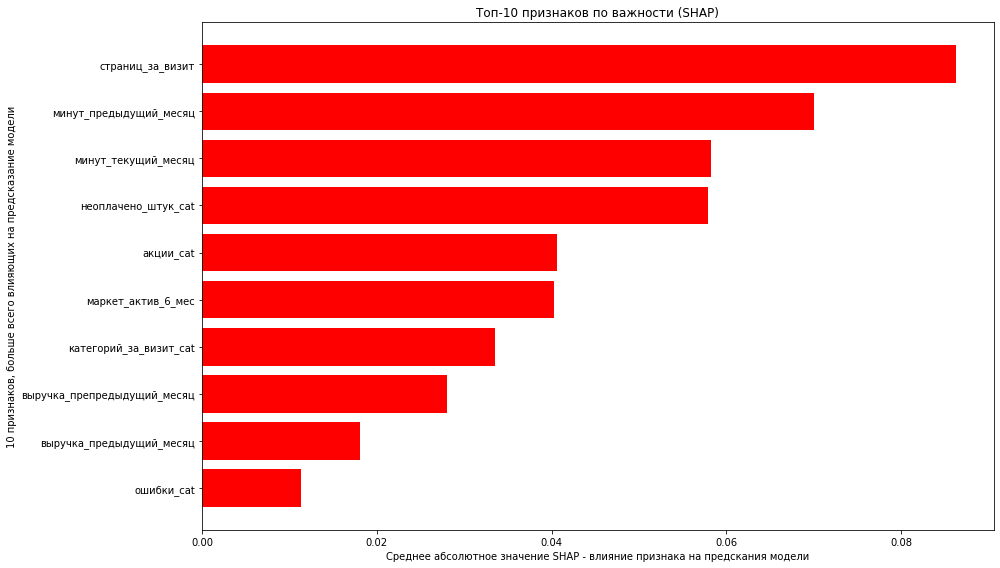

In [76]:
def get_feature_names(column_transformer):
    output_features = []
    for name, transformer, columns in column_transformer.transformers_:
        if transformer == 'drop' or transformer is None:
            continue
        if hasattr(transformer, 'get_feature_names_out'):
            try:
                names = transformer.get_feature_names_out(columns)
            except TypeError:
                names = transformer.get_feature_names_out()
        else:
            if isinstance(columns, slice):
                names = column_transformer.feature_names_in_[columns]
            else:
                names = columns
        output_features.extend(names)
    return output_features

best_model = search.best_estimator_
svc_model = best_model.named_steps['models']
preprocessor = best_model.named_steps['preprocessor']

X_train_enc = preprocessor.fit_transform(X_train)
X_test_enc = preprocessor.transform(X_test)

explainer = shap.Explainer(svc_model.predict_proba, X_train_enc)
shap_values = explainer(X_test_enc)

features_out = get_feature_names(preprocessor)

mean_abs_shap = np.abs(shap_values[:, :, 1].values).mean(axis=0)
top_indices = np.argsort(mean_abs_shap)[-10:]  # 10 самых важных

plt.figure(figsize=(14, 8))
plt.title("Топ-10 признаков по важности (SHAP)")
plt.barh(range(10), mean_abs_shap[top_indices], color='red')
plt.yticks(range(10), [features_out[i] for i in top_indices])
plt.ylabel('10 признаков, больше всего влияющих на предсказание модели')
plt.xlabel("Среднее абсолютное значение SHAP - влияние признака на предскания модели")
plt.tight_layout()
plt.show()

### Выводы

**Что больше всего влияет:**

1. Сколько страниц просматривает клиент за визит — это главный индикатор вовлеченности.
2. Сколько минут клиент проводит на сайте, особенно в предыдущем месяце — чем дольше, тем выше интерес.
3. Сколько товаров клиент не оплачивает — это тревожный сигнал.
4. Активность в текущем месяце — важно для оценки вовлеченности и удержания.

**Простыми словами:**

1. Поведение клиента важнее, чем то, что он покупает.
2. Активность на сайте и интерес к разным товарам — хороший признак.
3. Если клиент не завершает покупки или делает ошибки — это повод для внимания.
4. Выручка и типы товаров менее значимы, чем вовлеченность.

**Для бизнеса:**

Необходимо сосредоточиться на поведении пользователей: отслеживать, как долго они сидят на сайте, сколько смотрят и насколько разнообразные покупки совершают. Возможно улучшение интерфейса, чтобы минимизировать ошибки и незавершённые заказы 

## Сегментация покупателей

### Сегментация покупателей на основе имеющихся данных

Для сегментации покупателей будем использовать вероятности принадлежности к классу 1 - снижение покупательной активности выручки с пользователя

In [77]:
X_transformed = pipe_final.named_steps['preprocessor'].fit_transform(X)
model = search.best_estimator_.named_steps['models']
proba = model.predict_proba(X_transformed)[:, 1]

proba_df = pd.DataFrame({
    'id': market_file['id'],
    'вероятность_снижения': proba
})

In [78]:
proba_profit_df = proba_df.merge(money, on='id', how='left')

profit_quantiles = proba_profit_df['прибыль'].quantile([0.35, 0.65])
low_profit = profit_quantiles[0.35]
high_profit = profit_quantiles[0.65]

In [79]:
proba_profit_df.head()

,id,вероятность_снижения,прибыль
0,215349,0.430529,4.16
1,215350,0.123386,3.13
2,215351,0.073019,4.87
3,215352,0.249796,4.21
4,215353,0.155505,3.95


In [80]:
def segment_customer(row):
    prob = row['вероятность_снижения']
    profit = row['прибыль']
    
    if prob < 0.35:
        prob_cat = 'низкая'
    elif prob <= 0.65:
        prob_cat = 'средняя'
    else:
        prob_cat = 'высокая'
    
    if profit < low_profit:
        profit_cat = 'низкая'
    elif profit <= high_profit:
        profit_cat = 'средняя'
    else:
        profit_cat = 'высокая'
    
    return f"{prob_cat}_вероятность_{profit_cat}_прибыль"

proba_profit_df['сегмент'] = proba_profit_df.apply(segment_customer, axis=1)

proba_profit_df.head()

,id,вероятность_снижения,прибыль,сегмент
0,215349,0.430529,4.16,средняя_вероятность_средняя_прибыль
1,215350,0.123386,3.13,низкая_вероятность_низкая_прибыль
2,215351,0.073019,4.87,низкая_вероятность_высокая_прибыль
3,215352,0.249796,4.21,низкая_вероятность_средняя_прибыль
4,215353,0.155505,3.95,низкая_вероятность_средняя_прибыль


### Выбор сегмента и его оформление в основном датафрейме

Для анализа выберем пользователей с высокой прибылью и высокой вероятностью снижения активности, потому что бизнесу важно сохранить активность пользователей, приносящих деньги

In [81]:
segment_data = proba_profit_df[proba_profit_df['сегмент'] == 'высокая_вероятность_высокая_прибыль']
segment_analysis = segment_data.merge(market_file, on='id', how='left')

segment_analysis.head()

,id,вероятность_снижения,прибыль,сегмент,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,длительность,популярная_категория,страниц_за_визит,актив_тек_мес_cat,акции_cat,категорий_за_визит_cat,неоплачено_штук_cat,ошибки_cat
0,215418,0.701938,4.98,высокая_вероятность_высокая_прибыль,Снизилась,стандарт,нет,1.7,472,Домашний текстиль,3,средняя_активность,только_акции,низкий,выше_среднего,средний
1,215459,0.935313,5.16,высокая_вероятность_высокая_прибыль,Снизилась,премиум,да,4.1,768,Кухонная посуда,6,средняя_активность,только_акции,низкий,высокий,выше_среднего
2,215478,0.726673,4.97,высокая_вероятность_высокая_прибыль,Снизилась,стандарт,да,4.1,753,Товары для детей,2,средняя_активность,умеренно_акционный,низкий,высокий,низкий
3,215481,0.851675,4.42,высокая_вероятность_высокая_прибыль,Снизилась,стандарт,да,3.8,844,Товары для детей,2,низкая_активность,только_акции,ниже_среднего,высокий,средний
4,215496,0.740304,4.64,высокая_вероятность_высокая_прибыль,Снизилась,премиум,да,4.0,684,Техника для красоты и здоровья,4,средняя_активность,смешанный,очень_низкий,выше_среднего,низкий


### Анализ покупательной способности группы покупателей

In [82]:
segment_analysis.describe().T

,count,mean,std,min,25%,50%,75%,max
id,16.0,215597.187500,112.913075,215418.000000,215492.25000,215639.500000,215702.000000,215737.000000
вероятность_снижения,16.0,0.782445,0.091901,0.666613,0.71268,0.748923,0.857478,0.935313
прибыль,16.0,4.880000,0.324160,4.420000,4.64000,4.910000,5.070000,5.590000
маркет_актив_6_мес,16.0,3.362500,1.041713,0.900000,2.85000,3.650000,4.025000,4.800000
длительность,16.0,633.062500,186.568832,225.000000,473.50000,684.500000,756.750000,846.000000
страниц_за_визит,16.0,3.687500,1.621471,2.000000,2.00000,3.000000,5.250000,6.000000


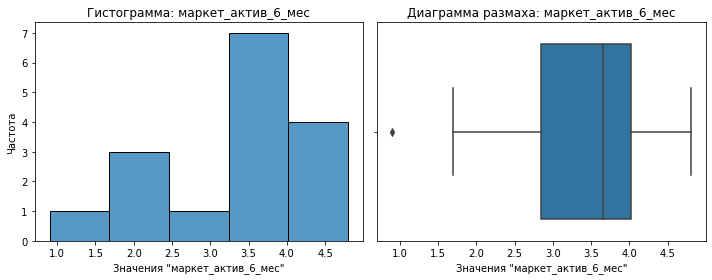

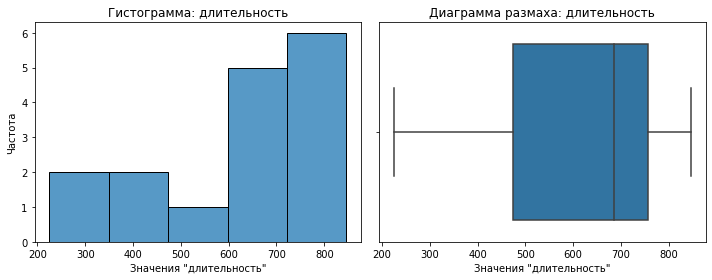

In [83]:
cat_cols=['тип_сервиса', 'разрешить_сообщать', 'популярная_категория', 
          'актив_тек_мес_cat', 'акции_cat','категорий_за_визит_cat', 
          'ошибки_cat', 'неоплачено_штук_cat', 'страниц_за_визит']
num_cols = ['маркет_актив_6_мес', 'длительность']

for col in num_cols:
    hist_and_boxplot(segment_analysis, col)

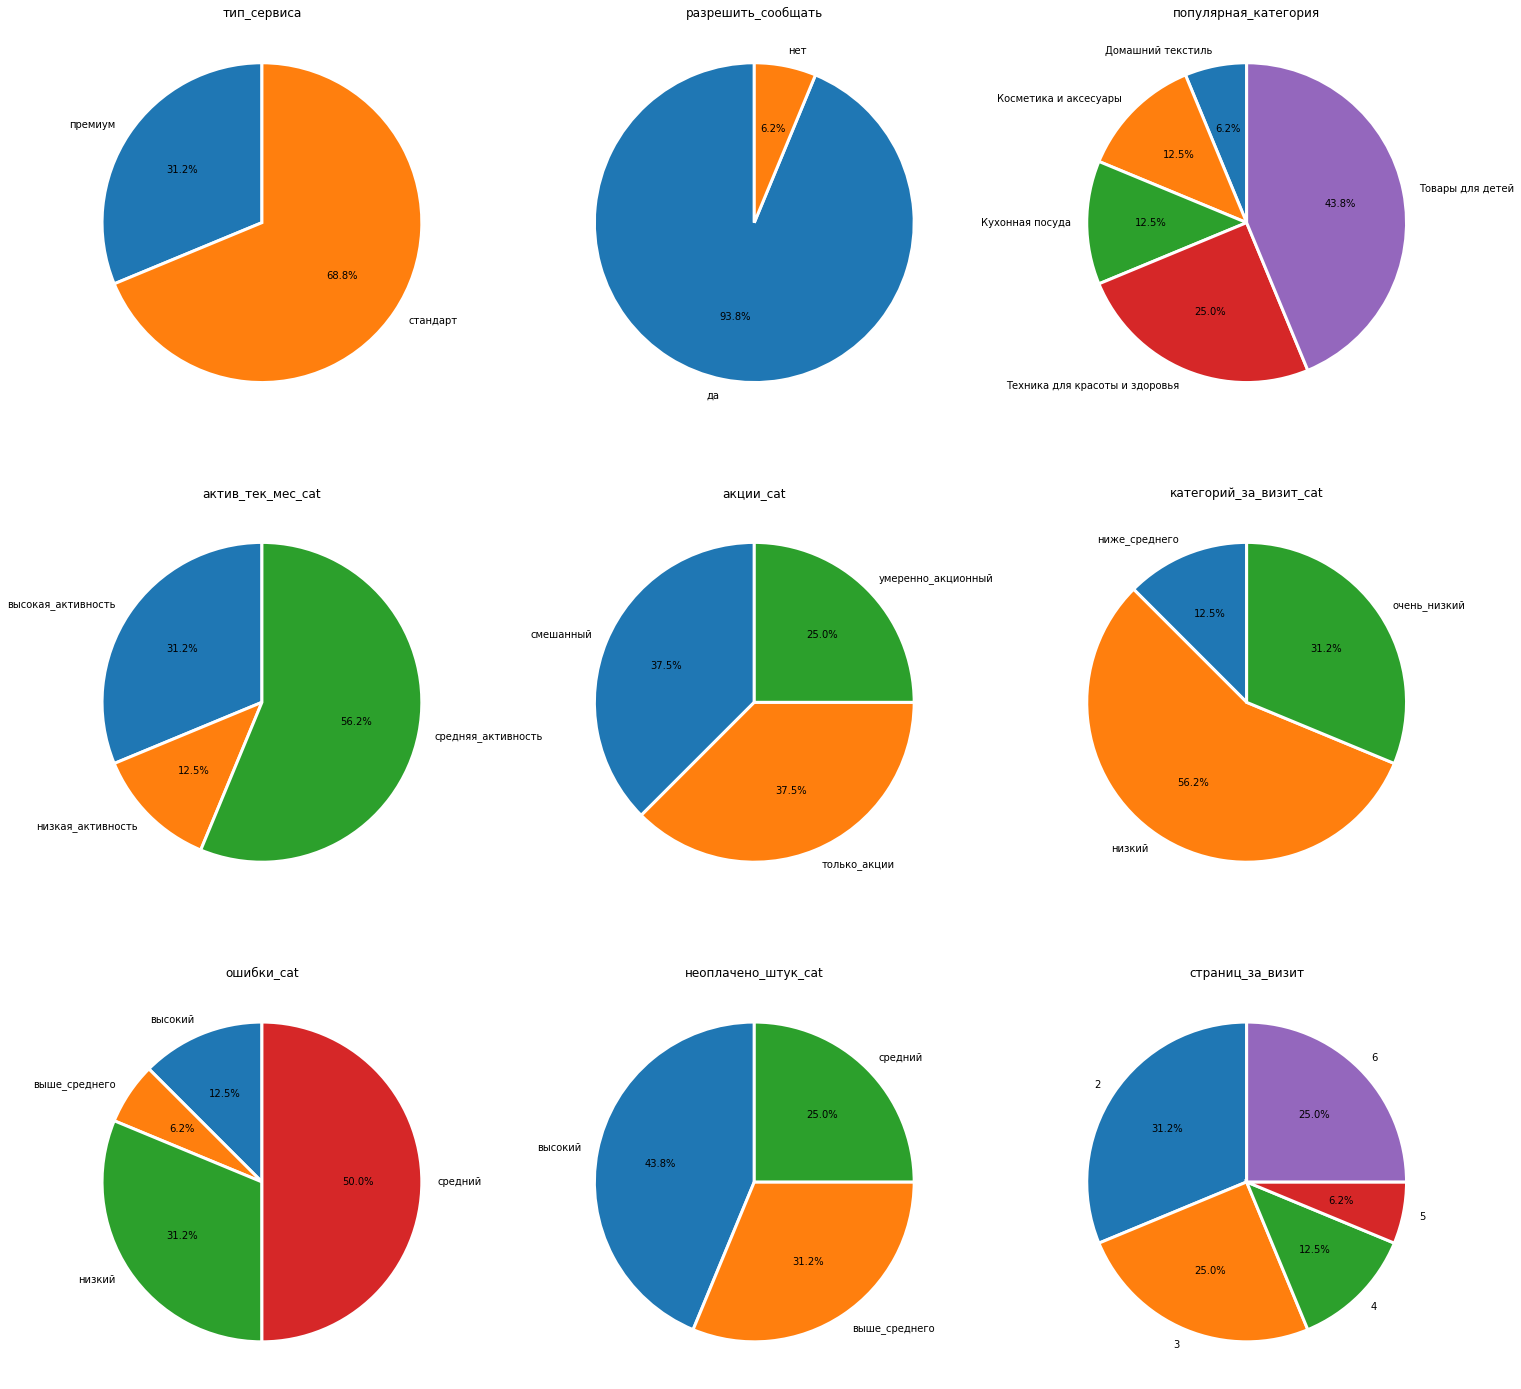

In [84]:
i=1
plt.figure(figsize=(25,25))
for cat in cat_cols:
    pie(segment_analysis, cat, 3, 3,i)
    i+=1

### Выводы

1. **"маркет_актив_6_мес"**
   - Значения маркетинговой активности за 6 месяцев варьируются от 1 до 5, с пиком около 3-4. Диаграмма размаха показывает, что большинство значений сосредоточено в диапазоне 2-5, с минимальными выбросами.
   - Вывод: Средний уровень маркетинговой активности стабилен, но есть клиенты с низкой активностью (1), которым нужно чаще присылать рекламные материалы для их "активации".

2. **"длительность"**
   - Длительность (дни с момента регистрации) варьируется от 200 до 900 дней, с пиком около 500-600 дней. Диаграмма размаха подтверждает широкое распределение, с некоторыми выбросами ниже 200.
   - Вывод: Клиенты имеют разный стаж взаимодействия, что может влиять на их лояльность и активность.

3. **"страниц_за_визит"**
   - Количество страниц за визит варьируется от 1 до 6, с пиком около 2-3. Диаграмма размаха показывает узкий диапазон, с минимальными выбросами.
   - Вывод: Клиенты проводят мало времени на сайте, что может указывать на низкую вовлечённость, нужно запросить у фокус группы исследование, как увеличить активность, чего не хватает. так же может помочь обратная связь от пользователей


1. **"тип_сервиса"**
   - Большинство клиентов используют стандартный сервис
   - Вывод: Премиум-клиенты составляют меньшинство. Возможно это связано с неосведомленностью о том, какие преимущества дает премиум или неудобства оформления или пользования премиумом.

2. **"разрешить_сообщать"**
   - Большинство открыто для коммуникаций, что упрощает персонализированную рекламу.

3. **"популярная_категория"**
   - Основные категории: "Товары для детей" (43.8%), "Техника для красоты и здоровья" (24.2%), "Кухонная посуда" и "Косметика" (12.5%).
   - Вывод: Товары для детей и Косметика доминируют, что указывает на ключевую аудиторию, состоящую из женщин, в частности матерей.

4. **"актив_тек_мес"**
   - Текущая активность равномерно распределена, но есть потенциал для роста, так как есть пользователи с малым количеством полученной маркетинговой информации

5. **"ошибка_сервиса"**
   - Около половины клиентов из сегмента встречаются с ошибками нечасто, однако также велика доля пользователей, редко встречающих ошибки

6. **"неоплаченные_продукты_штук_квартал"**
   - Высокий уровень брошенных корзин, что может указывать на проблемы с завершением покупок

7. **"акции"**
   - В целом приверженцы данного сегмента часто пользуются акцонными предложениями

8. **"категорий_за_визит"**
   - Пользователи за сеанс просматривают категорий ниже среднего. Это может быть связано с недостатком какой-то необходимой категории или недостатком товаров из смежных категорий. Также это может быть связано с неосведомленностью об акциях и интересных лотах в других категориях.


# Предложение по увеличению активности

1. **Упрощение процесса покупки**:
   - Уменьшить количество шагов для завершения заказа, чтобы снизить число неоплаченных продуктов. Например, добавить кнопку "Купить в 1 клик" для популярных категорий.

2. **Персонализированные рекомендации**:
   - Предложить клиентам из категории "Товары для детей" персонализированные скидки (например, 10-15%) на основе их истории покупок. Использовать данные "Популярная_категория" для таргетинга.

3. **Улучшение вовлечённости**:
   - Добавить интерактивные элементы на сайте (например, подборки товаров или квизы), чтобы увеличить количество просмотренных страниц за визит.

4. **Снижение ошибок сервиса**:
   - Провести аудит сайта и устранить технические сбои, особенно для премиум-клиентов, чтобы повысить их лояльность.

5. **Кампания для разрешивших рассылку**:
   - Разослать уведомления с напоминаниями о брошенных корзинах и предложениями скидок для клиентов, разрешивших сообщения.

Обоснование
- Упрощение покупки и персонализация повысят конверсию за счёт устранения барьеров (неоплаченные продукты).
- Увеличение вовлечённости удержит клиентов на сайте дольше, что может привести к дополнительным покупкам.
- Исправление ошибок и таргетированная рассылка улучшат опыт премиум- и лояльных клиентов, минимизируя отток.

## Выводы

Задачей данного иссследования было построение модели, которая бы предсказала уменьшение покупательской активности пользователей интернет-магазина "В один клик".
Другой задачей было исследование выбранного сегмента пользователей.

**В рамках исследования были проделаны следующие шаги.**

1. Загрузка данных - Исходными данными для исследования были четыре отдельных csv файла:
 1. с данными о поведении покупателя на сайте, коммуникации с ним и его продуктовом поведении.
 2. с данными о выручке, которую получает магазин с покупателя за период
 3. с данными о времени (в минутах), которое покупатель провёл на сайте в течение периода
 4. данными о среднемесячной прибыли покупателя за последние 3 месяца: какую прибыль получает магазин от продаж каждому покупателю 


2. Предобработка данных

Исходные данные оказались хорошего качества, но тем не менее они требовали проведения некоторых работ перед началом анализа, таких например, как обработка аномальных значений

3. Исследовательский анализ данных

На этом этапе были построены диаграммы распределения всех признаков. С помощью графиков были обнаружены и исправлены опечатки в категоральных признаках. Также дискретные количественные признаки были преобразованы в категориальные

4. Корреляционный анализ данных

Целевым признаком является Покупательская_активность и вот список полей, которые имеют хоть корреляцию с ним: Маркет_актив_6_мес, Акционные_покупки, Средний_просмотр_категорий_за_визит, Неоплаченные_продукты_штук_квартал, Страниц_за_визит, Выручка_препредыдущий_месяц, минут_предыдущий_месяц, минут_текущий_месяц. Мультиколлинеарности не было выявлено поэтому все признаки были оставленны в датасете.

5. Объеденение таблиц

Датасеты market_file, market_money, market_time были объеденены в один датафрейм.

6. Обучение модели

С использованием пайпланов из библиотеки sklearn были обучены модели KNeighborsClassifier(), DecisionTreeClassifier(), LogisticRegression() и SVC(). При обучении моделей с помощью пайплайна перебирались гиперпараметр моделей с целью нахождения модели, которая даст лучший результат.
По результатам обучения лучшей стала модель SVC: C=0.1, kernel = poly, probability=True, random_state=42. Метрика roc_auc для тренеровочной выборки 0.9205 для тестовой 0.8984
* Также была реализована константная модель для того, чтобы наглядно показать разницу между случайными угадываниями и предсказаниями от модели, разница в точности составила почти 50%

7. Анализ важности признаков

Анализ показал, что на покупательную активность пользователя поведение влияет сильнее, чем то, что он покупает. Бизнесу необходимо повышать вовлеченность пользователей и удобство пользованием платформой, поскольку продолжительность пребывания на сайте напрямую влияет на покупки.

8. Сегментация пользователей

Для анализа пользователей был выбран сегмент пользователей с высокой прибылью для платформы и в то же время имеющих высокую вероятность снижения покупательской активности. Для увеличения активности клиентов следует упростить процесс покупки, внедрить персонализированные предложения, добавить интерактивные элементы на сайт и устранить технические ошибки. Также важно использовать разрешения на рассылки для таргетированных уведомлений и стимулов к завершению покупок.